In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import category_encoders as ce
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("License_Data.csv", low_memory=False)

df.head(5).T

,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


In [3]:
## fix column names

columns_fixed = [col.replace(" ", "_").lower() for col in df.columns]

df.columns = columns_fixed

df.head().T

,0,1,2,3,4
id,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
license_id,1256593,1639294,1980233,1476582,1896750
account_number,32811,262311,345008,273121,213785
site_number,1,29,1,1,1
legal_name,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
doing_business_as_name,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
address,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
city,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
state,IL,IL,IL,IL,IL
zip_code,60623.0,60618,60035,60439,60087


In [4]:
 def get_dataset_info(dataframe):
     print(f"The shape of the data is {dataframe.shape[0]} rows and {dataframe.shape[1]}")

     print("-----------------------------------------------------------------\n")

     print(f"The dataset types are: {dataframe.info()}")

     print("-----------------------------------------------------------------\n")

     
     

In [5]:
get_dataset_info(df)

The shape of the data is 85895 rows and 32
-----------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 85895 non-null  object 
 1   license_id                         85895 non-null  int64  
 2   account_number                     85895 non-null  int64  
 3   site_number                        85895 non-null  int64  
 4   legal_name                         85895 non-null  object 
 5   doing_business_as_name             85894 non-null  object 
 6   address                            85895 non-null  object 
 7   city                               85895 non-null  object 
 8   state                              85895 non-null  object 
 9   zip_code                           85864 non-null  object 
 10  ward    

## Variable Description

### Dependent variables

1. AAI - Licensed Status is issued
2. AAC - Licensed Status is cancelled
3. REV - Licensed Status is revoked
4. REA - Licensed Status is revoked and appealed
5. INQ - Licensed Status is in enquiry

In [6]:
#check for the imbalnce of the target variables

df["license_status"].value_counts()

license_status
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: count, dtype: int64

## Univariate Analysis

In [7]:
df.license_description.value_counts(normalize=True)

license_description
Limited Business License                    0.583014
Home Repair                                 0.123791
Peddler, non-food                           0.032738
Home Occupation                             0.032703
Retail Food Establishment                   0.027021
                                              ...   
Indoor Special Event                        0.000012
Affiliation                                 0.000012
Airport Pushcart Liquor Midway - Class A    0.000012
Not-For-Profit Club                         0.000012
Motor Vehicle Services License              0.000012
Name: proportion, Length: 106, dtype: float64

<Axes: ylabel='license_description'>

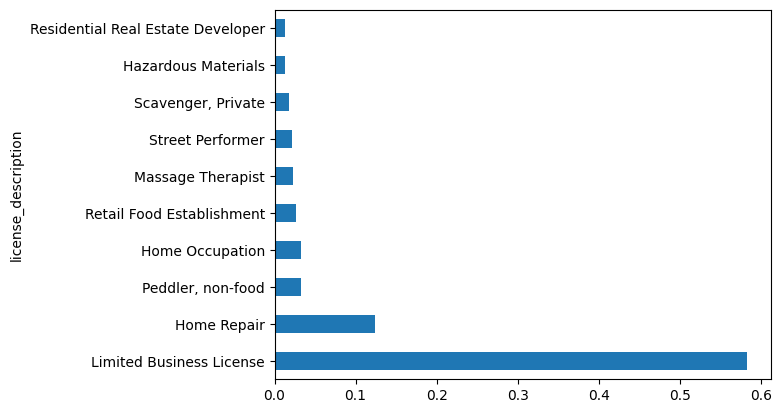

In [8]:
df.license_description.value_counts(normalize=True)[:10].plot.barh()

## Bivariate Analysis

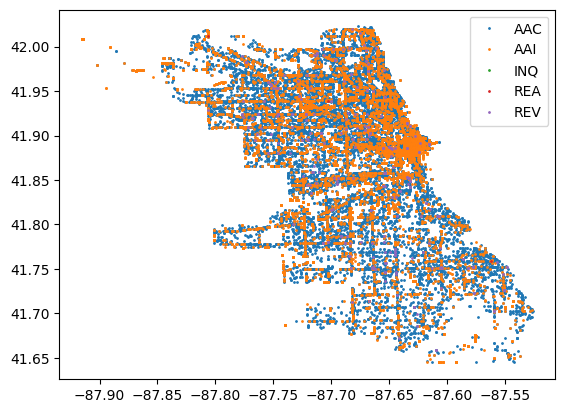

In [9]:
sdf = df[["longitude", "latitude", "license_status"]]

groups = sdf.groupby("license_status")
fig, ax = plt.subplots()

ax.margins(0.05)

for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=1, label=name)
    ax.legend()

plt.show()

In [10]:
pd.crosstab(df["license_status"], df["application_type"]).reset_index()

application_type,license_status,C_CAPA,C_EXPA,C_LOC,ISSUE,RENEW
0,AAC,7,3,287,7916,21987
1,AAI,0,0,1112,15425,38863
2,INQ,0,0,0,2,0
3,REA,0,0,0,0,3
4,REV,0,2,1,55,232


<Axes: title={'center': 'Applcation type vs License status'}, xlabel='license_status'>

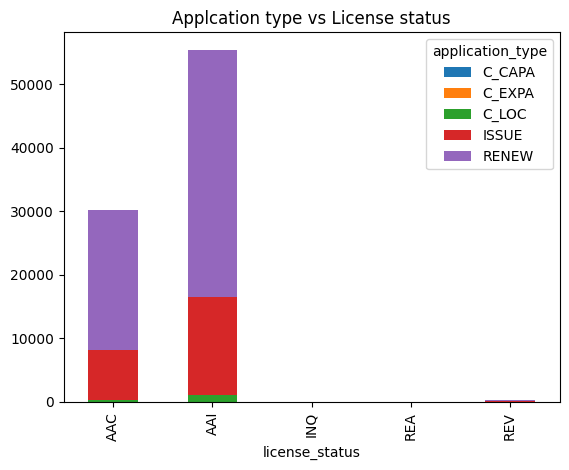

In [11]:
pd.crosstab(df["license_status"], df["application_type"]).reset_index().plot(x="license_status", kind="bar", stacked=True, title="Applcation type vs License status")

In [12]:
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

In [13]:
#drop irrelevant columns
columns_to_drop = df.drop(columns=['id', 'account_number', 'address', 'ssa', 'license_id', 'location','application_created_date'])
df = columns_to_drop
df.columns

Index(['site_number', 'legal_name', 'doing_business_as_name', 'city', 'state',
       'zip_code', 'ward', 'precinct', 'ward_precinct', 'police_district',
       'license_code', 'license_description', 'license_number',
       'application_type', 'application_requirements_complete', 'payment_date',
       'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'latitude', 'longitude',
       'license_status'],
      dtype='object')

In [14]:
#check 

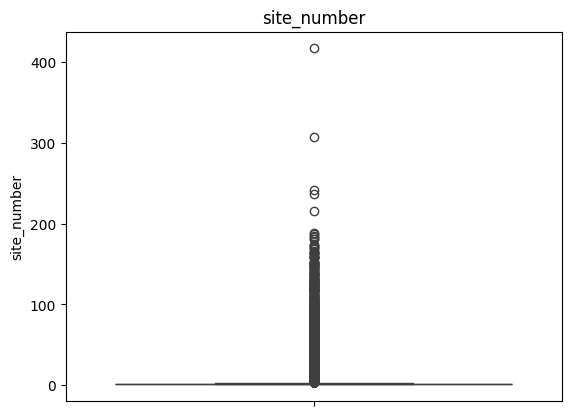

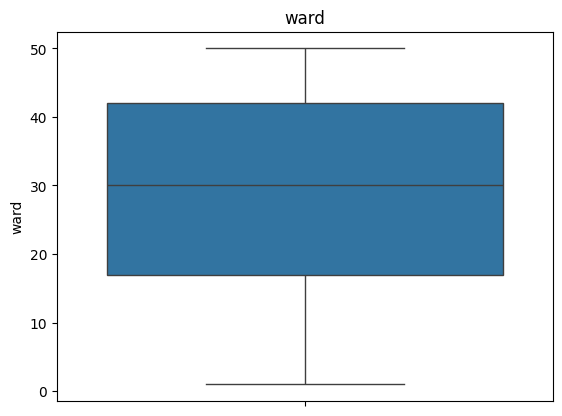

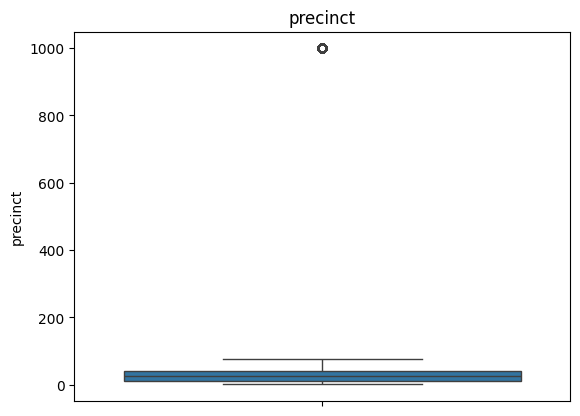

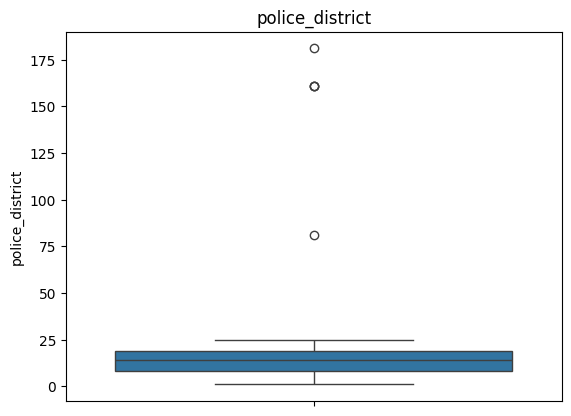

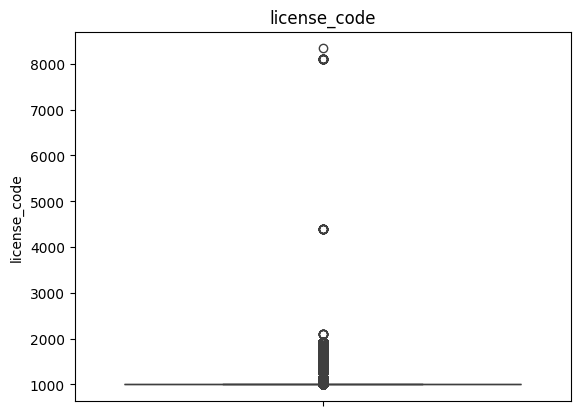

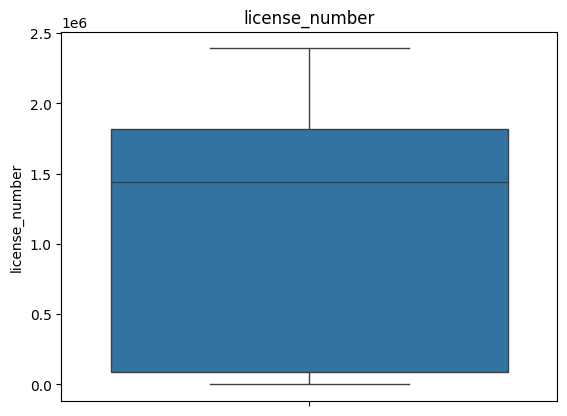

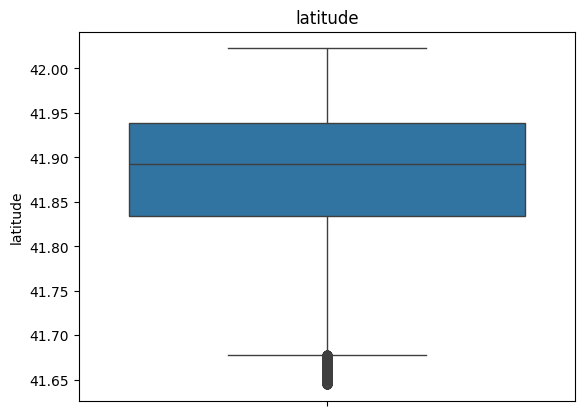

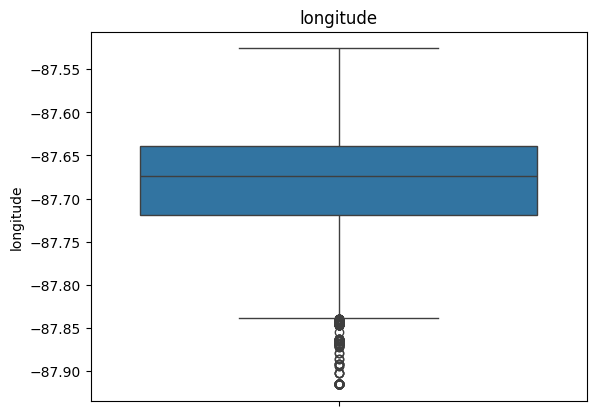

In [15]:
for col in df.select_dtypes(include=[np.number]):  # Iterate only through numerical columns
    sns.boxplot(df[col])
    plt.title(col)  # Add title as the column name
    plt.show()

In [16]:
#remove outliers using IQR method

def iqr(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    min = q1 - 1.5 * q1
    max = q3 + 1.5 * q3
    return col[((col < min) | (col > max))]

In [17]:
for col in df.select_dtypes(include=[np.number]):
    print(f"The outliers in {col} are: ", iqr(df[col]))
    

The outliers in site_number are:  1         29
16        29
113       19
118       30
127       14
        ... 
85775      6
85843     26
85856    164
85878     12
85893     43
Name: site_number, Length: 3767, dtype: int64
The outliers in ward are:  Series([], Name: ward, dtype: float64)
The outliers in precinct are:  9        999.0
33       999.0
70       999.0
215      999.0
347      999.0
         ...  
85117    999.0
85279    999.0
85718    999.0
85781    999.0
85820    999.0
Name: precinct, Length: 838, dtype: float64
The outliers in police_district are:  1599     161.0
45329    181.0
61734    161.0
62903    161.0
82638     81.0
Name: police_district, dtype: float64
The outliers in license_code are:  521      8100
1320     8100
3233     4401
7032     8100
12248    4401
13242    8100
19636    4401
19804    8100
21835    8100
23976    8100
28878    4404
30805    8100
32572    4404
33750    8100
36193    4401
37181    8100
40842    8100
41680    4401
43745    8100
47275    4401
48345

In [18]:
# using z -score method
def z_score_outlier(col, lb, ub):
    z_score = ((col - col.mean()) / col.std()).copy()
    return col[((z_score < lb) | (z_score > ub))]

In [19]:
for col in df.select_dtypes(include=[np.number]):
    print(f"The outliers in {col} are: ", z_score_outlier(df[col], -3, 3))

The outliers in site_number are:  1         29
16        29
118       30
146       42
166       35
        ... 
85583     53
85599     30
85630     38
85856    164
85893     43
Name: site_number, Length: 1121, dtype: int64
The outliers in ward are:  Series([], Name: ward, dtype: float64)
The outliers in precinct are:  9        999.0
33       999.0
70       999.0
215      999.0
347      999.0
         ...  
85117    999.0
85279    999.0
85718    999.0
85781    999.0
85820    999.0
Name: precinct, Length: 838, dtype: float64
The outliers in police_district are:  1599     161.0
45329    181.0
61734    161.0
62903    161.0
82638     81.0
Name: police_district, dtype: float64
The outliers in license_code are:  113      2101
521      8100
763      1932
875      1930
1320     8100
         ... 
85308    1931
85406    2101
85486    1931
85589    1930
85798    1930
Name: license_code, Length: 289, dtype: int64
The outliers in license_number are:  Series([], Name: license_number, dtype: float64)

In [20]:
df["license_status"].value_counts()

license_status
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: count, dtype: int64

In [21]:
df.dtypes

site_number                            int64
legal_name                            object
doing_business_as_name                object
city                                  object
state                                 object
zip_code                              object
ward                                 float64
precinct                             float64
ward_precinct                         object
police_district                      float64
license_code                           int64
license_description                   object
license_number                       float64
application_type                      object
application_requirements_complete     object
payment_date                          object
conditional_approval                  object
license_term_start_date               object
license_term_expiration_date          object
license_approved_for_issuance         object
date_issued                           object
license_status_change_date            object
latitude  

In [22]:
## parse dates properly

In [23]:
# df.application_requirements_complete = pd.to_datetime(df.application_requirements_complete)
# df.payment_date = pd.to_datetime(df.payment_date).astype(str)
# df.license_term_start_date = pd.to_datetime(df.license_term_start_date)
# df.license_term_expiration_date = pd.to_datetime(df.license_term_expiration_date)
# df.date_issued = pd.to_datetime(df.date_issued)
# df.license_term_start_date = pd.to_datetime(df.license_term_start_date)
# df.license_approved_for_issuance = pd.to_datetime(df.license_approved_for_issuance)

In [24]:
# # find the number of days between different application status date
# df["completion_to_start"] = (df.license_term_start_date - df.application_requirements_complete).dt.days.astype(str)
# df["start_to_expiry"] = (df.license_term_expiration_date - df.license_term_start_date).dt.days
# df["approval_to_issuance"] = (df.date_issued - df.license_approved_for_issuance)
# # df["completion_to_payment"] = (df.payment_date - df.application_requirements_complete)
# # df["presence_of_enquiry_details"] = np.where(df.ward.isnull() | df.ward_precinct.isnull() | df.police_district | df.precinct)
df["target"] = df[["license_status"]].apply(lambda col:pd.Categorical(col).codes)

In [25]:
# df.approval_to_issuance = df.approval_to_issuance.astype(str)
# # df.completion_to_payment = df.completion_to_payment.astype(str)

In [26]:
df.dtypes

site_number                            int64
legal_name                            object
doing_business_as_name                object
city                                  object
state                                 object
zip_code                              object
ward                                 float64
precinct                             float64
ward_precinct                         object
police_district                      float64
license_code                           int64
license_description                   object
license_number                       float64
application_type                      object
application_requirements_complete     object
payment_date                          object
conditional_approval                  object
license_term_start_date               object
license_term_expiration_date          object
license_approved_for_issuance         object
date_issued                           object
license_status_change_date            object
latitude  

## clean up the nulls

In [27]:
# Drop non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fill NaN values with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [28]:
# Drop numeric columns
obj_cols = df.select_dtypes(include="object").columns

# Fill NaN values with the mean
mode_values = df[obj_cols].mode().iloc[0]
df[obj_cols] = df[obj_cols].fillna(mode_values)

In [29]:
df.isnull().sum()

site_number                          0
legal_name                           0
doing_business_as_name               0
city                                 0
state                                0
zip_code                             0
ward                                 0
precinct                             0
ward_precinct                        0
police_district                      0
license_code                         0
license_description                  0
license_number                       0
application_type                     0
application_requirements_complete    0
payment_date                         0
conditional_approval                 0
license_term_start_date              0
license_term_expiration_date         0
license_approved_for_issuance        0
date_issued                          0
license_status_change_date           0
latitude                             0
longitude                            0
license_status                       0
target                   

In [30]:
df.dtypes

site_number                            int64
legal_name                            object
doing_business_as_name                object
city                                  object
state                                 object
zip_code                              object
ward                                 float64
precinct                             float64
ward_precinct                         object
police_district                      float64
license_code                           int64
license_description                   object
license_number                       float64
application_type                      object
application_requirements_complete     object
payment_date                          object
conditional_approval                  object
license_term_start_date               object
license_term_expiration_date          object
license_approved_for_issuance         object
date_issued                           object
license_status_change_date            object
latitude  

## Target encoding the categorical varibales

In [31]:
import category_encoders as ce
import pandas as pd

# Concatenate the categorical variables into a single DataFrame
cat_df = df.select_dtypes(include="object")

# Initialize the TargetEncoder
encoder = ce.TargetEncoder()

# Fit and transform the categorical variables using the target variable
encoded_combined_df = encoder.fit_transform(cat_df, df['target'])

# Add the encoded values back to the original DataFrame
df = pd.concat([df, encoded_combined_df.add_suffix('_encoded')], axis=1)

In [32]:
df.head().T

,0,1,2,3,4
site_number,1,29,1,1,1
legal_name,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
doing_business_as_name,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
city,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
state,IL,IL,IL,IL,IL
zip_code,60623.0,60618,60035,60439,60087
ward,22.0,33.0,28.528927,28.528927,28.528927
precinct,28.0,23.0,54.632973,54.632973,54.632973
ward_precinct,22-28,33-23,42-,42-,42-
police_district,10.0,17.0,13.529812,13.529812,13.529812


## balanced the data

In [33]:
#balance the response variable data using SMOTE


def balance_data(df, class_col):
    
    """
          Balances the class distribution in the given dataframe using SMOTE.
        
          Args:
              df (pandas.DataFrame): The dataframe containing the data.
              class_col (str): The name of the column containing the class labels
        
          Returns:
              pandas.DataFrame: The dataframe with balanced class distribution.
    """
    
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from imblearn.over_sampling import RandomOverSampler
    cols = df.select_dtypes(include=np.number).columns.tolist()

    X = df[cols]
    X = X[X.columns.difference([class_col])]

    y = df[class_col]

    global X_train, X_test, y_train, y_test

    sampling_strategy = {1: 55400, 0: 55400, 4: 55400, 3: 55400, 2: 55400}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    sm = RandomOverSampler(random_state=0, sampling_strategy=sampling_strategy)
    X_train,y_train = sm.fit_resample(X_train, y_train)

In [34]:
balance_data(df, "target")

In [35]:
df.target.value_counts()

target
1    55400
0    30200
4      290
3        3
2        2
Name: count, dtype: int64

## Modelling

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3)



## Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
knn_model.fit((scaler.transform(X_train)), y_train)
scaler.fit(X_test)

y_pred = knn_model.predict(scaler.transform(X_test))

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00     11113
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00        64

    accuracy                           1.00     17179
   macro avg       0.75      0.75      0.75     17179
weighted avg       1.00      1.00      1.00     17179



### NIAVE BIAS

In [43]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
y_pred = nb_model.fit(X_train, y_train).predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.57      0.39      6000
           1       0.82      0.01      0.03     11113
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.01      0.58      0.01        64

    accuracy                           0.21     17179
   macro avg       0.23      0.23      0.09     17179
weighted avg       0.64      0.21      0.15     17179



### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

y_pred = dt_model.fit(X_train, y_train).predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00     11113
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        64

    accuracy                           1.00     17179
   macro avg       1.00      1.00      1.00     17179
weighted avg       1.00      1.00      1.00     17179



### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6000
           1       0.75      0.01      0.03     11113
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.30      0.01        64

    accuracy                           0.01     17179
   macro avg       0.15      0.06      0.01     17179
weighted avg       0.49      0.01      0.02     17179



In [66]:
#find the columns with the most relevant importance

feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by=0, ascending=True)[:]

feature_importance

,0,1
0,application_requirements_complete_encoded,0.0
1,application_type_encoded,0.0
2,city_encoded,0.0
3,conditional_approval_encoded,0.0
4,date_issued_encoded,0.0
5,doing_business_as_name_encoded,0.0
6,latitude,0.0
7,legal_name_encoded,0.0
8,license_approved_for_issuance_encoded,0.0
9,license_code,0.0
